<a href="https://colab.research.google.com/github/adinursetya/authorobufus/blob/main/evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import nltk
import pandas as pd
import gensim
from nltk.tokenize import word_tokenize
from gensim.models import FastText
from joblib import load
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
model = FastText.load_fasttext_format('/content/drive/MyDrive/Colab Notebooks/model/trained_model_id.bin')
content_train = load('/content/drive/MyDrive/Colab Notebooks/model/content_train.sav')
y_test = load('/content/drive/MyDrive/Colab Notebooks/model/y_test.sav')
attribution = load('/content/drive/MyDrive/Colab Notebooks/model/authorship.sav')
original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/origin.csv')
content_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/output_w2v.csv')
origin = original['content']

In [ ]:
content = content_test['content']
content

In [ ]:
origin

In [ ]:
def get_article_similarity(real_article, obfus_article):
    word_similarities = []

    for i in range(len(real_article)):
        if len(real_article[i]) > 1 and len(obfus_article[i]) > 1:
            word1 = real_article[i].lower()
            word2 = obfus_article[i].lower()
            similarity = 1

            if word1 != word2:
                    similarity = model.wv.similarity(word1, word2)

            word_similarities.append(similarity)

    average_similarity = sum(word_similarities) / len(word_similarities)

    return average_similarity

In [ ]:
get_article_similarity(origin,content)

In [ ]:
vec = CountVectorizer()
content_train = vec.fit_transform(content_train)
content_test = vec.transform(content)

In [ ]:
result = attribution.predict(content)
acc = accuracy_score(y_test, result)
f1 = f1_score( y_test, result, average='macro')

In [ ]:
model = FastText.load_fasttext_format('trained_model_id.bin')

In [ ]:
original = pd.read_csv('origin.csv')
test1 = pd.read_csv('output_w2v.csv')
test2 = pd.read_csv('output_glv.csv')
test3 = pd.read_csv('output_fast.csv')

In [ ]:
test1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/output_w2v.csv')
test1

In [ ]:
test2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/output_glv.csv')
test2

In [ ]:
test3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/output_fast.csv')
test3

In [ ]:
origin = original['content']
test1 = test1['content']
test2 = test2['content']
test3 = test3['content']

In [ ]:
get_article_similarity(origin,test2)

In [ ]:
get_article_similarity(origin,test3)

In [ ]:
from joblib import load
content_train = load('/content/drive/MyDrive/Colab Notebooks/model/content_train.sav')
y_test = load('/content/drive/MyDrive/Colab Notebooks/model/y_test.sav')
attribution = load('/content/drive/MyDrive/Colab Notebooks/model/authorship.sav')

In [ ]:
import pandas as pd
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/output_fast.csv')
content_test = test['content']

In [ ]:
content_test

In [ ]:
content_train

In [ ]:
vec = CountVectorizer()
content_train = vec.fit_transform(content_train)
content_test = vec.transform(content_test)

In [ ]:
result = attribution.predict(content_test)
result

In [ ]:
y_test = np.array(y_test)
y_test

In [ ]:
acc = accuracy_score(y_test, result)
acc

In [ ]:
f1 = f1_score( y_test, result, average='macro')
f1

In [ ]:
import pandas as pd
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/output_fast.csv')
content_save = test['content']

In [ ]:
new = content_save
indices = [i for i in range(len(new))]
df_new = pd.DataFrame({'index': indices, 'content': new, 'real_author' : y_test, 'predicted_author' : result})
#df_new.to_csv('Hasil_W2V.csv', index = False)

In [ ]:
df_new

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,result)
cm

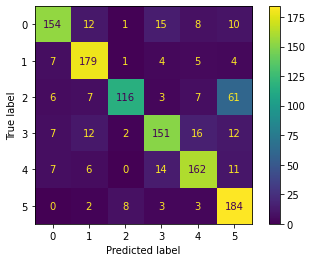

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

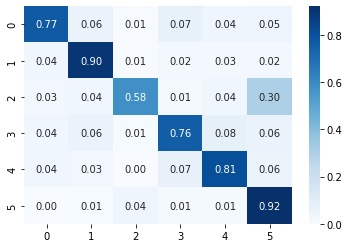

In [ ]:
sns.heatmap(cm/200, annot=True, fmt='.2f', cmap='Blues')

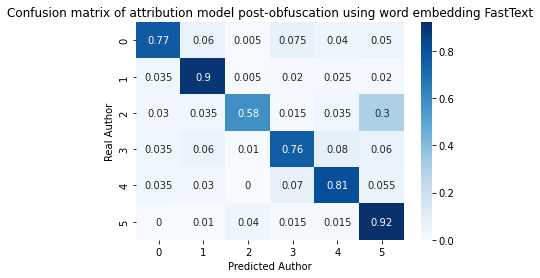

In [ ]:
df = pd.DataFrame({'real': y_test, 'prediction':result})
confusion_matrix = pd.crosstab(df['real'], df['prediction'], rownames=['Real Author'], colnames=['Predicted Author'])

sns.heatmap(confusion_matrix/200, annot=True, cmap='Blues')
plt.title('Confusion matrix of attribution model post-obfuscation using word embedding FastText')
plt.show()